In [2]:
%matplotlib inline
from threeML import *
import numpy as np
from matplotlib import pyplot as plt
import sys
import time


WARNING UserWarning: Using default configuration from /home/simonste/.venv/3ml/local/lib/python2.7/site-packages/threeML-0.4.946-py2.7.egg/threeML/data/threeML_config.yml. You might want to copy it to /home/simonste/.threeML/threeML_config.yml to customize it and avoid this warning.


WARNING RuntimeWarning: Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


WARNING RuntimeWarning: Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML



In [3]:
pa = '/home/simonste/research/xrb/data/'
data_path = pa + 'input%s.txt'%'g'
gdata = XYLike.from_text_file("gdata", data_path)
gdata.assign_to_source(source_name = 'Xrb_gband_source')

data_path = pa +'input%s.txt'%'r'
rdata = XYLike.from_text_file("rdata", data_path)
rdata.assign_to_source(source_name = 'Xrb_rband_source')

data_path = pa +'input%s.txt'%'i'
idata = XYLike.from_text_file("idata", data_path)
idata.assign_to_source(source_name = 'Xrb_iband_source')

data_path = pa +'input%s.txt'%'z'
zdata = XYLike.from_text_file("zdata", data_path)
zdata.assign_to_source(source_name = 'Xrb_zband_source')

data_path = pa +'input%s.txt'%'J'
Jdata = XYLike.from_text_file("Jdata", data_path)
Jdata.assign_to_source(source_name = 'Xrb_Jband_source')

data_path = pa +'input%s.txt'%'H'
Hdata = XYLike.from_text_file("Hdata", data_path)
Hdata.assign_to_source(source_name = 'Xrb_Hband_source')

data_path = pa +'input%s.txt'%'K'
Kdata = XYLike.from_text_file("Kdata", data_path)
Kdata.assign_to_source(source_name = 'Xrb_Kband_source')

data = DataList(gdata,rdata,idata,zdata,Jdata,Hdata,Kdata)


WARNING FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls



Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.
Using Gaussian statistic (equivalent to chi^2) with the provided errors.


In [4]:
def ModeltoPointSource(band):
    mod = TemplateModel('Xrb_HSESDsizeincluded_%s'%band,log_interp = False)
    mod.K.fix = True
    mod.scale.fix =True
    
    return PointSource('Xrb_%s_source'%band, 0, 0, spectral_shape = mod)

#modtest = TemplateModel('Xrb_HSES_gband',log_interp = False)
#modnewtest = modtest= + 0.2
##print modtest,modnewtest

filter_list = ['gband','rband','iband','zband','Jband','Hband','Kband']
point_source_list = ['ps_g','ps_r','ps_i','ps_z','ps_J','ps_H','ps_K']
PointSdict = {}
for h in range(len(filter_list)):
    PointSdict[point_source_list[h]] = ModeltoPointSource(filter_list[h])

my_model = Model(PointSdict['ps_g'],PointSdict['ps_r']
                 ,PointSdict['ps_i'],PointSdict['ps_z']
                 ,PointSdict['ps_J'],PointSdict['ps_H'],PointSdict['ps_K'])

In [5]:
allInklParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.Inkl,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESDsizeincluded_iband.Inkl,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESDsizeincluded_zband.Inkl,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESDsizeincluded_Jband.Inkl,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESDsizeincluded_Hband.Inkl,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESDsizeincluded_Kband.Inkl]
allDtempParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.Dtemp,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESDsizeincluded_iband.Dtemp,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESDsizeincluded_zband.Dtemp,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESDsizeincluded_Jband.Dtemp,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESDsizeincluded_Hband.Dtemp,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESDsizeincluded_Kband.Dtemp]
allHSTempParams =[my_model.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.HSTemp,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESDsizeincluded_iband.HSTemp,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESDsizeincluded_zband.HSTemp,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESDsizeincluded_Jband.HSTemp,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESDsizeincluded_Hband.HSTemp,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESDsizeincluded_Kband.HSTemp]
allHSwidthParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.HSWidth,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESDsizeincluded_iband.HSWidth,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESDsizeincluded_zband.HSWidth,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESDsizeincluded_Jband.HSWidth,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESDsizeincluded_Hband.HSWidth,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESDsizeincluded_Kband.HSWidth]
allHSAwidthParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.HSAwidth,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESDsizeincluded_iband.HSAwidth,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESDsizeincluded_zband.HSAwidth,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESDsizeincluded_Jband.HSAwidth,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESDsizeincluded_Hband.HSAwidth,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESDsizeincluded_Kband.HSAwidth]
allT_secParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.T_sec,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESDsizeincluded_iband.T_sec,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESDsizeincluded_zband.T_sec,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESDsizeincluded_Jband.T_sec,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESDsizeincluded_Hband.T_sec,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESDsizeincluded_Kband.T_sec]
alldistfacParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.distfac,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESDsizeincluded_iband.distfac,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESDsizeincluded_zband.distfac,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESDsizeincluded_Jband.distfac,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESDsizeincluded_Hband.distfac,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESDsizeincluded_Kband.distfac]
allDsizeParams = [my_model.Xrb_rband_source.spectrum.main.Xrb_HSESDsizeincluded_rband.Dsize,
                 my_model.Xrb_iband_source.spectrum.main.Xrb_HSESDsizeincluded_iband.Dsize,
                 my_model.Xrb_zband_source.spectrum.main.Xrb_HSESDsizeincluded_zband.Dsize,
                 my_model.Xrb_Jband_source.spectrum.main.Xrb_HSESDsizeincluded_Jband.Dsize,
                 my_model.Xrb_Hband_source.spectrum.main.Xrb_HSESDsizeincluded_Hband.Dsize,
                 my_model.Xrb_Kband_source.spectrum.main.Xrb_HSESDsizeincluded_Kband.Dsize]

In [6]:
my_model.link(allInklParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Inkl)
my_model.link(allDtempParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Dtemp)
my_model.link(allHSTempParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.HSTemp)
my_model.link(allHSwidthParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.HSWidth)
my_model.link(allHSAwidthParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.HSAwidth)
my_model.link(allT_secParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.T_sec)
my_model.link(alldistfacParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.distfac)
my_model.link(allDsizeParams,my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Dsize)

In [15]:
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Inkl = 70
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Dtemp = 1500
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.HSTemp = 5000 #5000 bei HSWidth
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.HSWidth = 15
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.HSAwidth = 0.005
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.T_sec = 4100
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.distfac = -0.1
my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.Dsize = 0.75
phases = np.arange(0,1.01,0.01)

In [8]:
def oneparplot(phases,parval,ax):
    my_model.Xrb_gband_source.spectrum.main.Xrb_HSESDsizeincluded_gband.HSAwidth = parval
    mag = my_model.Xrb_gband_source.spectrum.main.shape(phases)
    ax.plot(phases,mag,label = r'$\Delta a_{HS} = %s a_{Disk}$'%parval)

SettingOutOfBounds: Trying to set parameter Dtemp = 60.0, which is less than the minimum allowed 1000.0

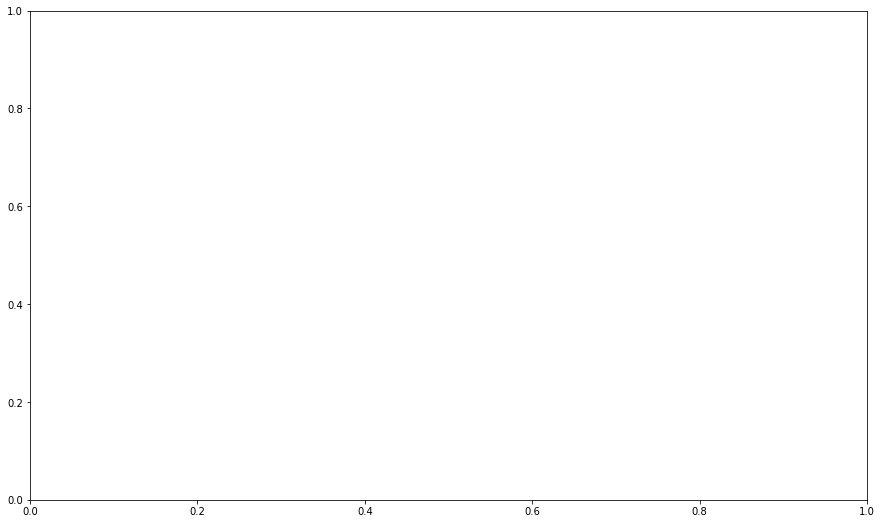

In [26]:

fig,ax = plt.subplots(figsize = (15,9))
ivalues = [60,65,70,75,78]
for i in ivalues:
    oneparplot(phases,i,ax)

ax.legend(fontsize = 25,loc = (0.9,0.6))
ax.set_xlabel(r'Phase $\Theta$',fontsize = 20)
ax.set_ylabel('Magnitude [AB]', fontsize = 20)
ax.tick_params(axis = 'both', direction = 'in', top = True , right = True, labelsize = 15 , length = 10, width = 2)
ax.invert_yaxis()
fig.savefig('Plots/ParstudyInkl.pdf')

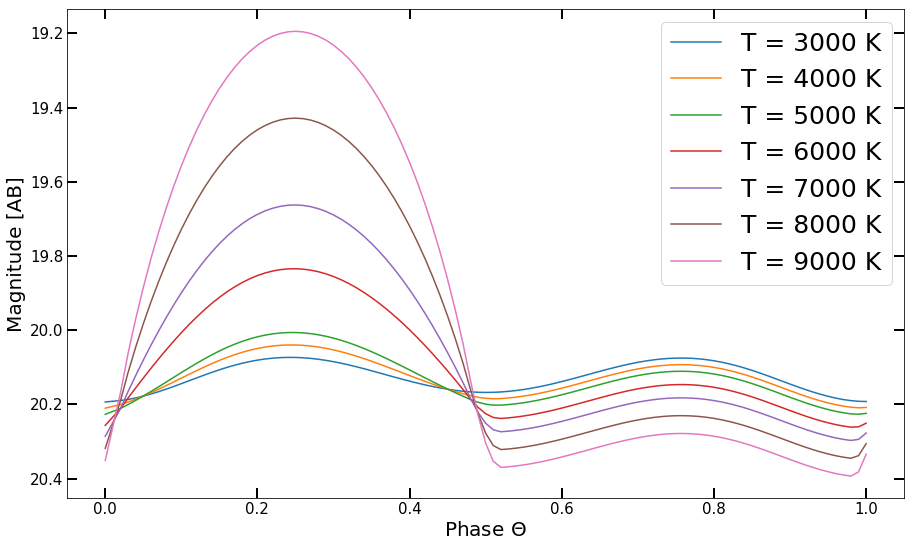

In [23]:
fig,ax = plt.subplots(figsize = (15,9))
Tvalues = [3000,4000,5000,6000,7000,8000,9000]
for i in Tvalues:
    oneparplot(phases,i,ax)

ax.legend(fontsize = 25,loc = 0)
ax.set_xlabel(r'Phase $\Theta$',fontsize = 20)
ax.set_ylabel('Magnitude [AB]', fontsize = 20)
ax.tick_params(axis = 'both', direction = 'in', top = True , right = True, labelsize = 15 , length = 10, width = 2)
ax.invert_yaxis()
fig.savefig('Plots/ParstudyHSTemp.pdf')

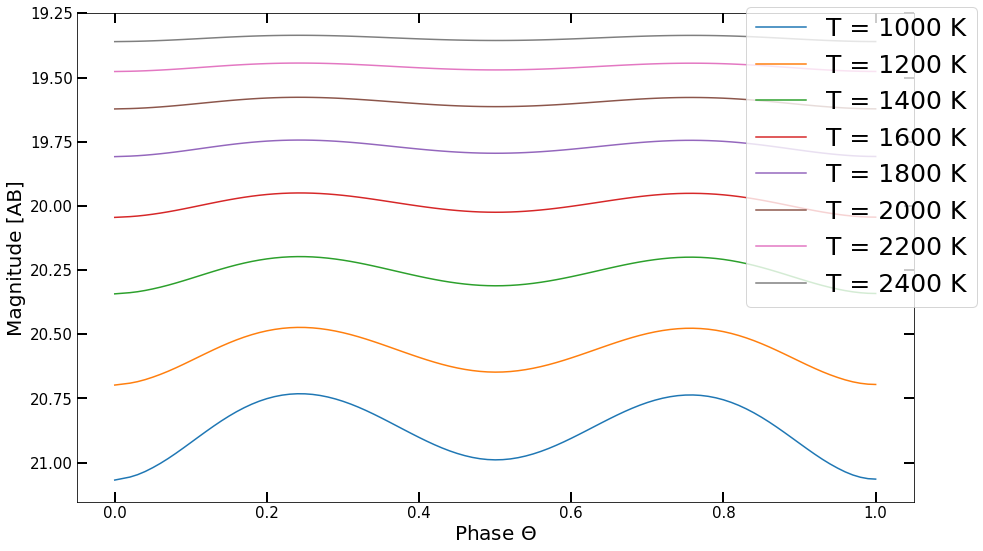

In [51]:
fig,ax = plt.subplots(figsize = (15,9))
Tvalues = [1000,1200,1400,1600,1800,2000,2200,2400]
for i in Tvalues:
    oneparplot(phases,i,ax)

ax.legend(fontsize = 25,loc = (0.8,0.4))
ax.set_xlabel(r'Phase $\Theta$',fontsize = 20)
ax.set_ylabel('Magnitude [AB]', fontsize = 20)
ax.tick_params(axis = 'both', direction = 'in', top = True , right = True, labelsize = 15 , length = 10, width = 2)
ax.invert_yaxis()
fig.savefig('Plots/ParstudyDTemp.pdf')

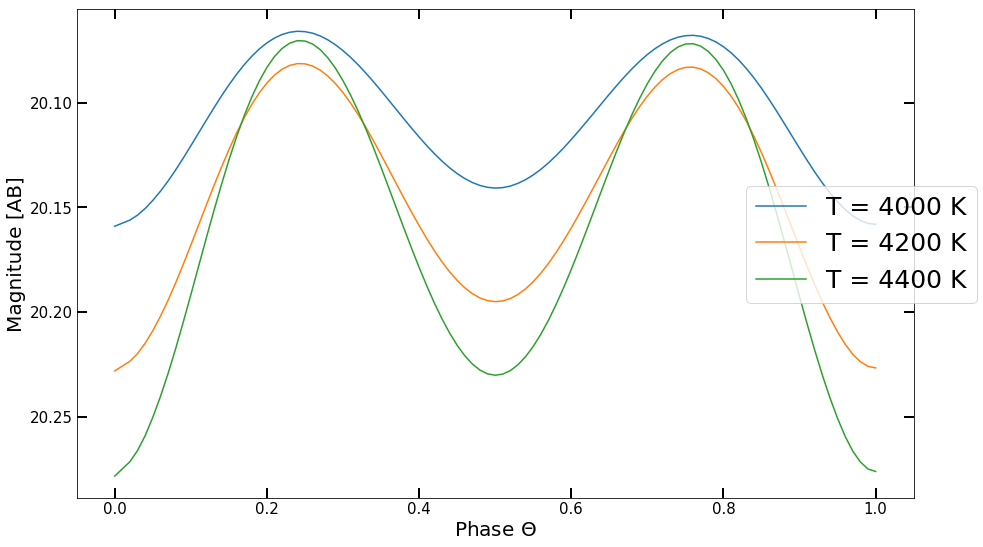

In [54]:
fig,ax = plt.subplots(figsize = (15,9))
Tvalues = [4000,4200,4400]
for i in Tvalues:
    oneparplot(phases,i,ax)

ax.legend(fontsize = 25,loc = (0.8,0.4))
ax.set_xlabel(r'Phase $\Theta$',fontsize = 20)
ax.set_ylabel('Magnitude [AB]', fontsize = 20)
ax.tick_params(axis = 'both', direction = 'in', top = True , right = True, labelsize = 15 , length = 10, width = 2)
ax.invert_yaxis()
fig.savefig('Plots/ParstudySecTemp.pdf')

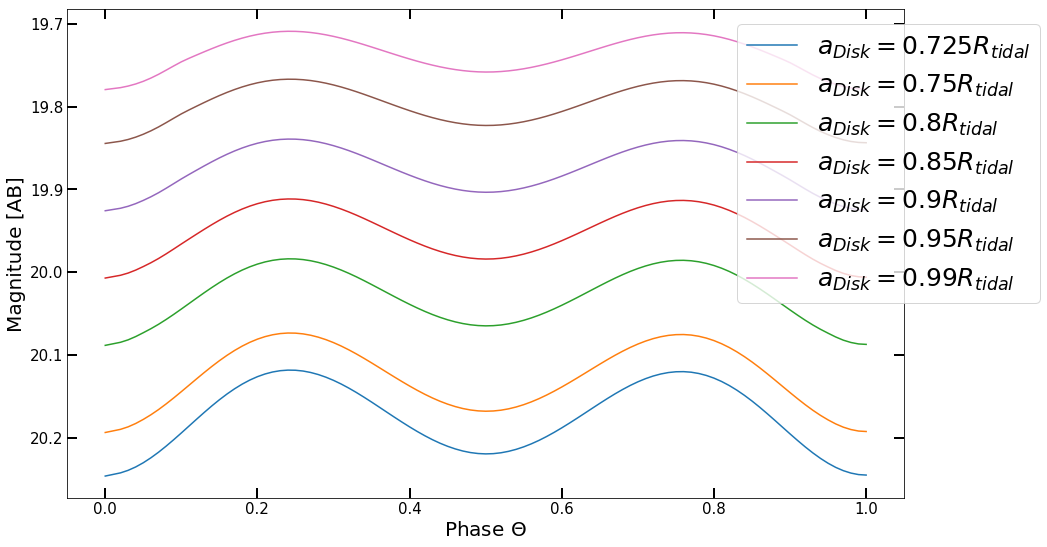

In [43]:
fig,ax = plt.subplots(figsize = (15,9))
Dsizeval = [0.725,0.75,0.8,0.85,0.9,0.95,0.99]
for i in Dsizeval:
    oneparplot(phases,i,ax)

ax.legend(fontsize = 25,loc = (0.8,0.4))
ax.set_xlabel(r'Phase $\Theta$',fontsize = 20)
ax.set_ylabel('Magnitude [AB]', fontsize = 20)
ax.tick_params(axis = 'both', direction = 'in', top = True , right = True, labelsize = 15 , length = 10, width = 2)
ax.invert_yaxis()
fig.savefig('Plots/ParstudyDSize.pdf')

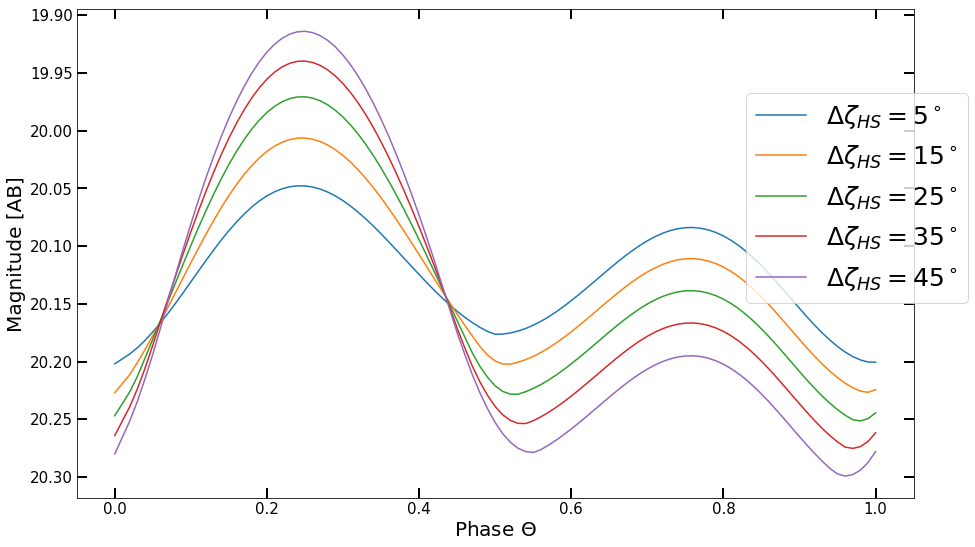

In [48]:
fig,ax = plt.subplots(figsize = (15,9))
HSwidthval = [5,15,25,35,45]
for i in HSwidthval:
    oneparplot(phases,i,ax)

ax.legend(fontsize = 25,loc = (0.8,0.4))
ax.set_xlabel(r'Phase $\Theta$',fontsize = 20)
ax.set_ylabel('Magnitude [AB]', fontsize = 20)
ax.tick_params(axis = 'both', direction = 'in', top = True , right = True, labelsize = 15 , length = 10, width = 2)
ax.invert_yaxis()
fig.savefig('Plots/ParstudyHSWidth.pdf')

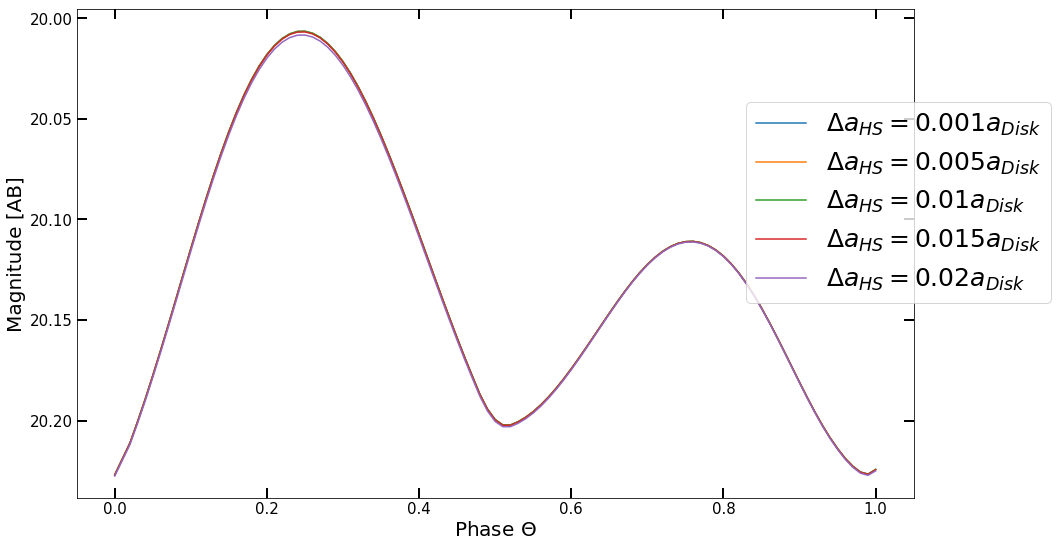

In [16]:
fig,ax = plt.subplots(figsize = (15,9))
HSawidthval = [0.001,0.005,0.01,0.015,0.02]
for i in HSawidthval:
    oneparplot(phases,i,ax)

ax.legend(fontsize = 25,loc = (0.8,0.4))
ax.set_xlabel(r'Phase $\Theta$',fontsize = 20)
ax.set_ylabel('Magnitude [AB]', fontsize = 20)
ax.tick_params(axis = 'both', direction = 'in', top = True , right = True, labelsize = 15 , length = 10, width = 2)
ax.invert_yaxis()
fig.savefig('Plots/ParstudyHSAWidth.pdf')